Carga de Zona y Vol potencial

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load the Excel file
df = pd.read_csv('Vol potencial.csv')

## Limpieza

Se agrupa por cliente, zona y empresa

In [2]:
# Load the CSV file 'Zona.csv' into a Pandas DataFrame
df_zona = pd.read_csv('Zona.csv')
# Group the data by 'RM/ REIQ_', 'Zona_Ranking', and 'Empresa'
grouped_df = df_zona.groupby(['RM/ REIQ_', 'Zona_Ranking', 'Empresa']).size().reset_index(name='Count')

Revisión de nombres no incluidos en la tabla de Zona que sí están en la base de potencial

In [3]:
# Get unique values of 'RM/REIQ' from 'Base potencial revisada' DataFrame
unique_base_rm_reiq = df['Base potencial revisada[RM/REIQ]'].unique()

# Get unique values of 'RM/ REIQ_' from 'grouped_df' DataFrame
unique_grouped_rm_reiq = grouped_df['RM/ REIQ_'].unique()

# Find the values in 'unique_base_rm_reiq' that are not in 'unique_grouped_rm_reiq'
not_included = set(unique_base_rm_reiq) - set(unique_grouped_rm_reiq)

Se observa que falta incluir:
'AGRICOLA PISCIS', 'MAXIAGRO GT', 'MAXIAGRO HN', 'PROMOTORES', 'WOLVERAGRO'

Se revisó y se homologaron los nombres para asegurar que el cruce sea correcto

In [4]:
# Replace values in the 'RM/ REIQ_' column of 'grouped_df'
replace_dict = {
    'AGRÍCOLA PISCIS': 'AGRICOLA PISCIS',
    'MaxiagroGT': 'MAXIAGRO GT',
    'MaxiagroHN': 'MAXIAGRO HN'
}
grouped_df['RM/ REIQ_'] = grouped_df['RM/ REIQ_'].replace(replace_dict)

Se ajustan los nombres de las columnas para facilitar su manejo

In [5]:
# Assuming 'df_base_potencial' is already loaded with the above columns
# Extract the text inside the brackets for each column name
new_column_names = [col.split('[')[-1].split(']')[0] if '[' in col and ']' in col else col for col in df.columns]

# Rename the columns of the DataFrame
df.columns = new_column_names

In [6]:
# Assuming 'df_base_potencial' is already loaded with the above columns
# Remove the 'Sum' or 'Average' prefix from each column name
new_column_names = [col.replace('Sum', '').replace('Average', '') if 'Sum' in col or 'Average' in col else col for col in df.columns]

# Rename the columns of the DataFrame
df.columns = new_column_names

Se incluye la columna de Zona y Empresa en la base de potencial

In [7]:
# Merge 'df_base_potencial' with 'grouped_df' on 'RM/REIQ' and 'RM/ REIQ_'
# Assuming 'df_base_potencial' is already loaded
merged_df = pd.merge(df, grouped_df, how='inner', left_on='RM/REIQ', right_on='RM/ REIQ_')

# Drop the redundant 'RM/ REIQ_' column
merged_df.drop('RM/ REIQ_', axis=1, inplace=True)

In [8]:
# Assuming 'df_base_potencial' is already loaded with the above columns
# Remove the 'Count' column from the DataFrame
merged_df.drop('Count', axis=1, inplace=True)

Se verifica que no haya valores en blanco, que esté completa la base

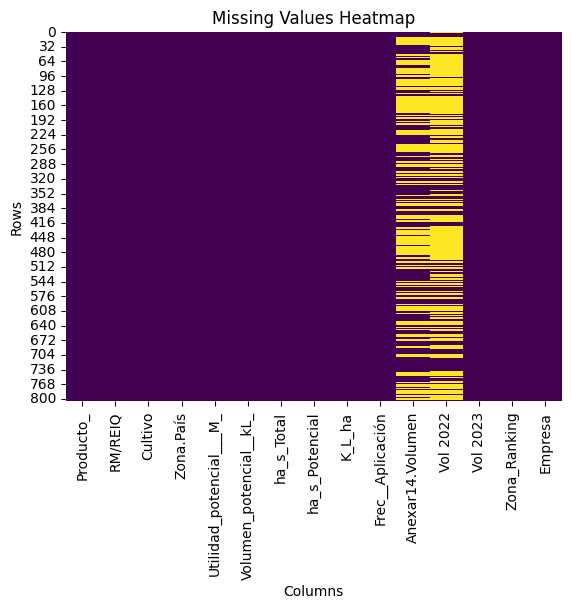

In [9]:
# Assuming df is your DataFrame

# Create a boolean DataFrame where True indicates a missing value
missing_data = merged_df.isnull()

# Create the heatmap
sns.heatmap(missing_data, cbar=False, cmap='viridis')

plt.title('Missing Values Heatmap')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()


## Análisis

**Se agrupa cultivo por Zona**

Se ordena por valor

In [10]:
# Assuming 'df_base_potencial' is already loaded with the above columns
# Pivot the DataFrame to get the sum of 'Volumen_potencial__kL_' for each 'Cultivo' and 'Zona_Ranking'
pivot_df = merged_df.pivot_table(index='Cultivo', columns='Zona_Ranking', values='Volumen_potencial__kL_', aggfunc='sum').fillna(0)

# Sort the rows by the sum of each row's values
pivot_df['Total'] = pivot_df.sum(axis=1)
pivot_df_sorted = pivot_df.sort_values(by='Total', ascending=False).drop('Total', axis=1)

Se muestra como porcentaje del total por columna.

In [11]:
# Assuming 'pivot_df_sorted' is already created
# Calculate the percentage of total value in the columns
pivot_df_percentage = (pivot_df_sorted / pivot_df_sorted.sum()) * 100

In [12]:
pivot_df_percentage

Zona_Ranking,01 Norte,02 Pacífico,03 Zona 2,04 Sureste,05 Propios,05 REIQ,06 Zona 1,08 Sud 1,"10 Ecu,Col"
Cultivo,,,,,,,,,
MAIZ,0.000000,0.000000,2.348014,0.000000,43.751964,23.151191,14.108704,0.000000,7.612896
AGUACATES,0.000000,51.631301,0.000000,0.000000,0.000000,16.579240,1.847866,22.080605,6.297941
CAFÉ,0.000000,0.000000,24.626528,0.000000,0.000000,0.000000,31.426203,0.000000,17.763423
CÍTRICOS,0.000000,0.000000,0.000000,27.788686,0.000000,23.300553,0.449481,6.517121,0.000000
VIDES DE MESA,19.507232,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.501231,0.978142
PAPA,0.000000,0.000000,0.508967,4.261635,8.768229,5.890858,0.624279,4.741060,14.533710
ARROZ,0.000000,0.000000,24.958012,0.000000,0.000000,0.000000,2.771799,10.598495,14.072323
LEGUMINOSA,0.000000,0.000000,0.000000,0.000000,6.718159,23.659023,9.414127,0.000000,0.000000
BANANO,0.000000,2.333093,26.421377,0.782749,0.000000,0.000000,11.748930,0.000000,14.887825


Se exporta tabla de resumen

In [13]:
pivot_df_percentage.to_csv('Participación por cultivo para cada Zona.csv')

Misma idea pero por país

In [14]:
# Assuming 'df_base_potencial' is already loaded with the above columns
# Pivot the DataFrame to get the sum of 'Volumen_potencial__kL_' for each 'Cultivo' and 'Zona_Ranking'
pivot_df_p = merged_df.pivot_table(index='Cultivo', columns='Zona.País', values='Volumen_potencial__kL_', aggfunc='sum').fillna(0)

# Sort the rows by the sum of each row's values
pivot_df_p['Total'] = pivot_df_p.sum(axis=1)
pivot_df_sorted_p = pivot_df_p.sort_values(by='Total', ascending=False).drop('Total', axis=1)
# Assuming 'pivot_df_sorted' is already created
# Calculate the percentage of total value in the columns
c = (pivot_df_sorted_p / pivot_df_sorted_p.sum()) * 100

In [15]:
pivot_df_sorted_p

Zona.País,Chile,Col,Cos R,Ecu,Guate,Hdrs,Mx,Nic,Pan,Perú,Sal
Cultivo,,,,,,,,,,,
MAIZ,0.0000,21.000,0.0000,78.00,120.000,27.00,824.485605,0.00,5.1000,0.0000,22.5
AGUACATES,138.0000,81.900,0.0000,0.00,22.200,0.00,596.374800,0.00,0.0000,237.0069,0.0
CAFÉ,0.0000,231.000,45.8850,0.00,46.200,144.00,0.000000,120.75,7.6050,0.0000,66.6
CÍTRICOS,45.3000,0.000,0.0000,0.00,5.400,0.00,425.707500,0.00,0.0000,65.3838,0.0
VIDES DE MESA,184.2000,12.720,0.0000,0.00,0.000,0.00,176.220000,0.00,0.0000,147.0000,0.0
PAPA,0.0000,189.000,0.5940,0.00,7.500,0.00,207.198450,0.00,0.5115,80.5200,0.0
ARROZ,0.0000,100.500,10.7100,82.50,0.000,0.00,0.000000,27.00,43.5000,180.0000,6.3
LEGUMINOSA,0.0000,0.000,0.0000,0.00,3.300,0.00,328.500000,42.00,0.0000,0.0000,67.8
BANANO,0.0000,88.605,47.4615,105.00,92.250,48.60,24.825000,0.30,9.9270,0.0000,0.0


Función para agrupar los top cultivos en porcentaje al seleccionar una zona

In [16]:
from IPython.display import display

def show_top_cultivos_by_zona(merged_df, Zona_Ranking):
    # Filter the DataFrame based on the selected Zona_Ranking
    zona_df = merged_df[[Zona_Ranking]]

    # Sort the DataFrame by the selected Zona_Ranking
    zona_df_sorted = zona_df.sort_values(by=Zona_Ranking, ascending=False).head(10)

    # Calculate the percentage of the total value for the selected Zona_Ranking
    zona_df_percentage = (zona_df_sorted / zona_df_sorted.sum()) * 100

    # Display the top 10 Cultivos as percentage for the selected Zona_Ranking
    display(zona_df_percentage)

Listado de zonas

**Top cultivos para zona seleccionada**

In [17]:
# Test the function with a sample Zona_Ranking
sample_zona_ranking = '06 Zona 1'

# Call the function
#show_top_cultivos_by_zona(pivot_df, sample_zona_ranking)

Se agrupa para que haya 3 columnas: Zona, Cultivo y porcentaje respecto a esa zona

In [18]:
# Export the pivot_df_percentage DataFrame to a CSV file
pivot_df_percentage.to_csv('participación_por_cultivo.csv')

# Read the exported CSV file back into a DataFrame
imported_df = pd.read_csv('participación_por_cultivo.csv')

# Transform column types
# Assuming the column names are the same as in your Power Query example
column_types = {
    'Cultivo': 'str',
    '01 Norte': 'float64',
    '02 Pacífico': 'float64',
    '03 Zona 2': 'float64',
    '04 Sureste': 'float64',
    '05 Propios': 'float64',
    '05 REIQ': 'float64',
    '06 Zona 1': 'float64',
    '08 Sud 1': 'float64',
    '10 Ecu,Col': 'float64'
}
imported_df = imported_df.astype(column_types)

# Unpivot other columns keeping 'Cultivo' as identifier
unpivoted_df = pd.melt(imported_df, id_vars=['Cultivo'], var_name='Atributo', value_name='Valor')

# Sort rows by 'Atributo' and 'Valor'
sorted_df = unpivoted_df.sort_values(by=['Atributo', 'Valor'], ascending=[True, False])

# Filter out rows where 'Valor' is 0
filtered_df = sorted_df[sorted_df['Valor'] != 0]

# Reorder columns
reordered_df = filtered_df[['Atributo', 'Cultivo', 'Valor']]

# Display the final DataFrame
#reordered_df.info()

In [19]:
# Unpivot other columns keeping 'Cultivo' as identifier
unpivoted_df_p = pd.melt(pivot_df_percentage.reset_index(), id_vars=['Cultivo'], var_name='Atributo', value_name='Valor')

# Sort rows by 'Atributo' and 'Valor'
sorted_df_p = unpivoted_df_p.sort_values(by=['Atributo', 'Valor'], ascending=[True, False])

# Filter out rows where 'Valor' is 0
filtered_df_p = sorted_df_p[sorted_df_p['Valor'] != 0]

# Reorder columns
reordered_df_p = filtered_df_p[['Atributo', 'Cultivo', 'Valor']]

**Potencial por país y por cultivo**

In [20]:
# Assuming 'df_base_potencial' is already loaded with the above columns
# Pivot the DataFrame to get the sum of 'Volumen_potencial__kL_' for each 'Cultivo' and 'Zona_Ranking'
pivot_df_ = merged_df.pivot_table(index='Cultivo', columns='Zona.País', values='Volumen_potencial__kL_', aggfunc='sum').fillna(0)

# Sort the rows by the sum of each row's values
pivot_df_['Total'] = pivot_df_.sum(axis=1)
pivot_df_sorted_ = pivot_df_.sort_values(by='Total', ascending=False).drop('Total', axis=1)

In [21]:
# Assuming 'pivot_df_sorted' is already created
# Calculate the percentage of total value in the columns
pivot_df_percentage_ = (pivot_df_sorted_ / pivot_df_sorted_.sum()) * 100

In [22]:
#Select columns to display top crops per country
#pivot_df_percentage_.reset_index()[['Ecu','Cultivo']]

In [23]:
pivot_df_sorted_.to_csv('Cultivos_por_país.csv')

## Pie de cultivos por zona

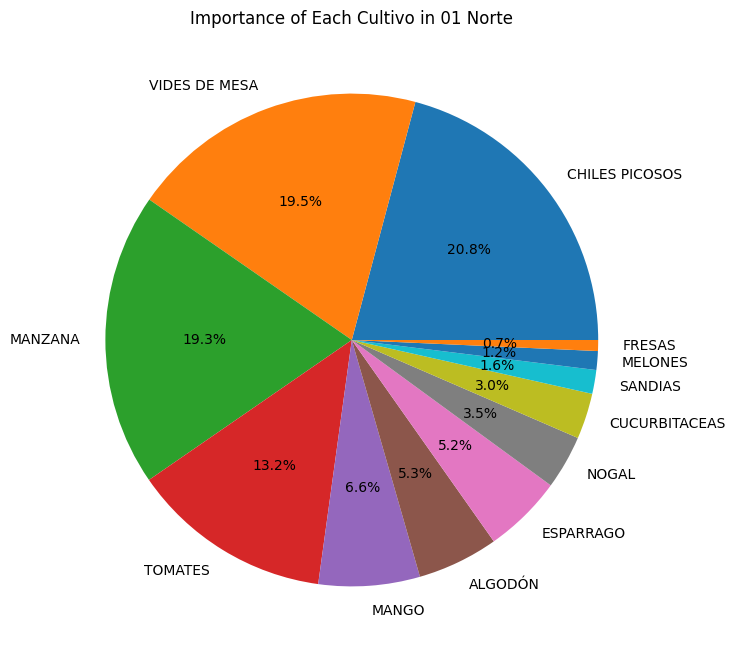

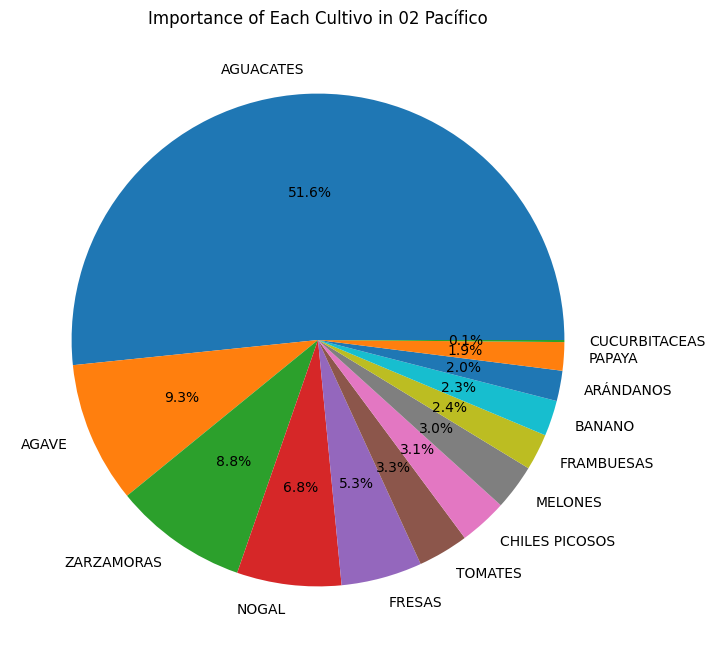

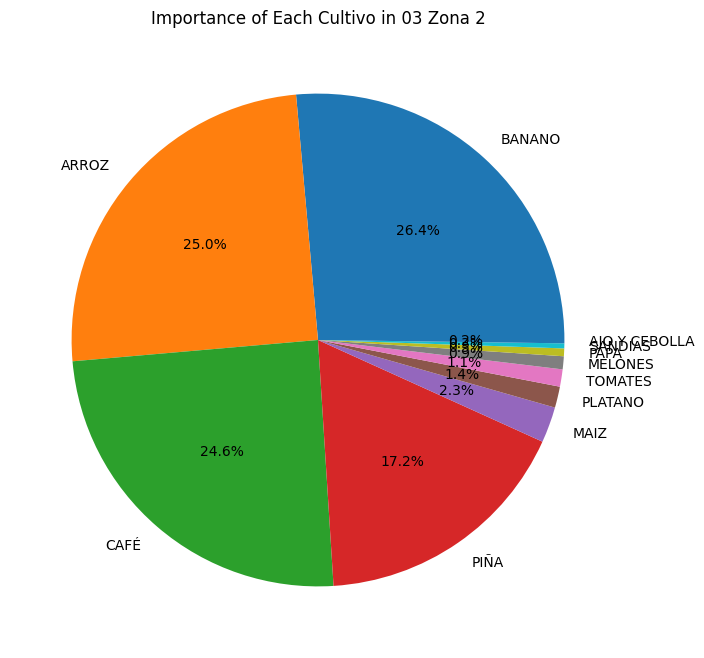

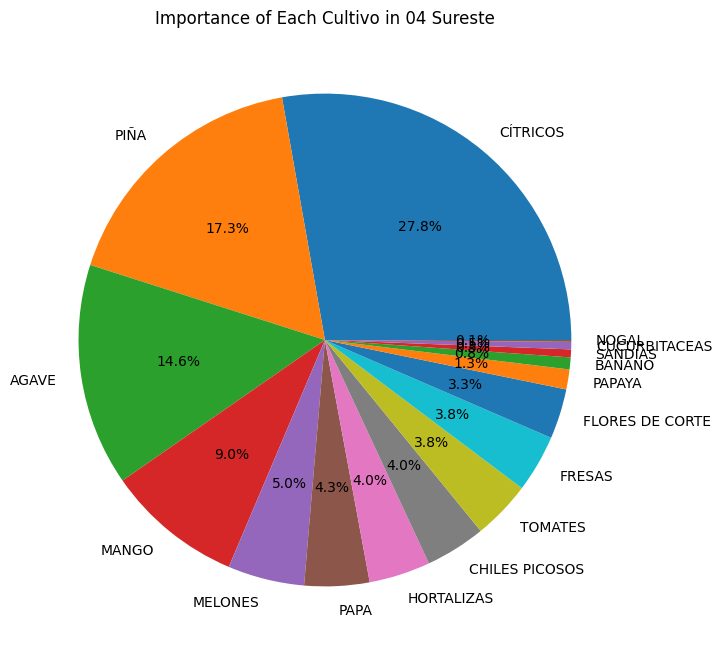

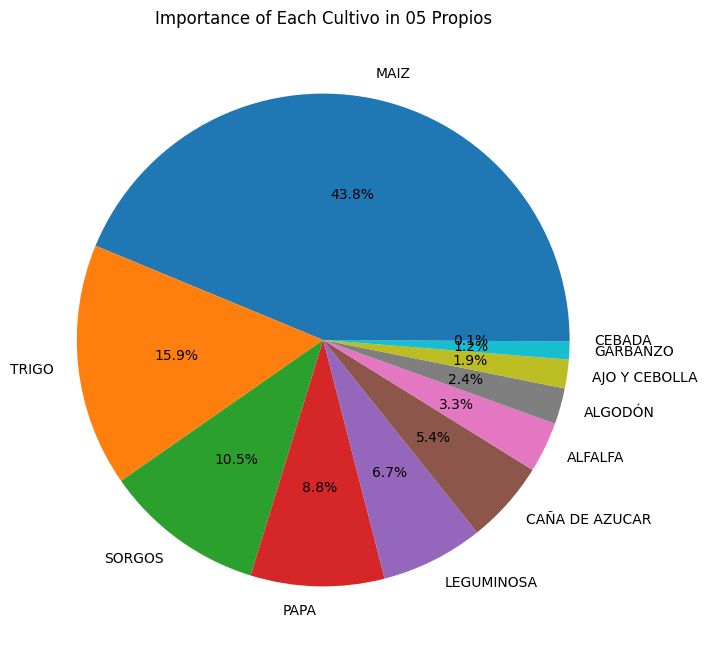

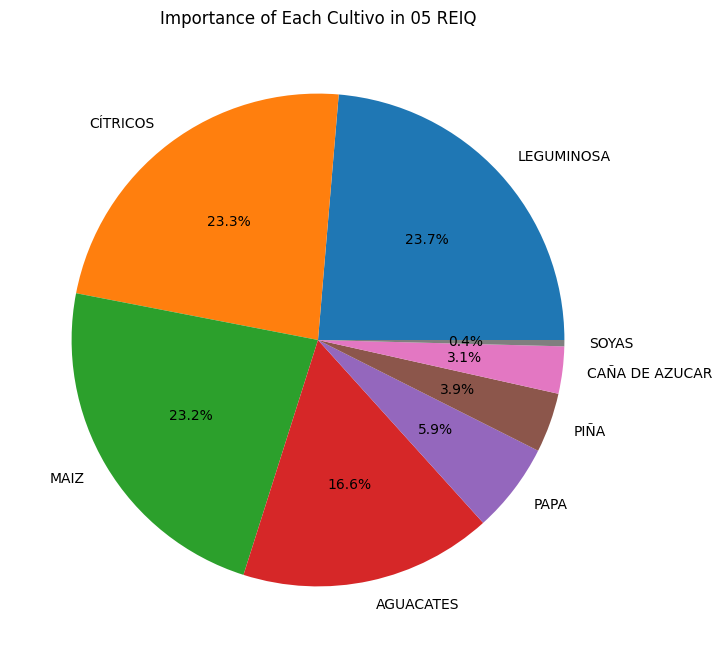

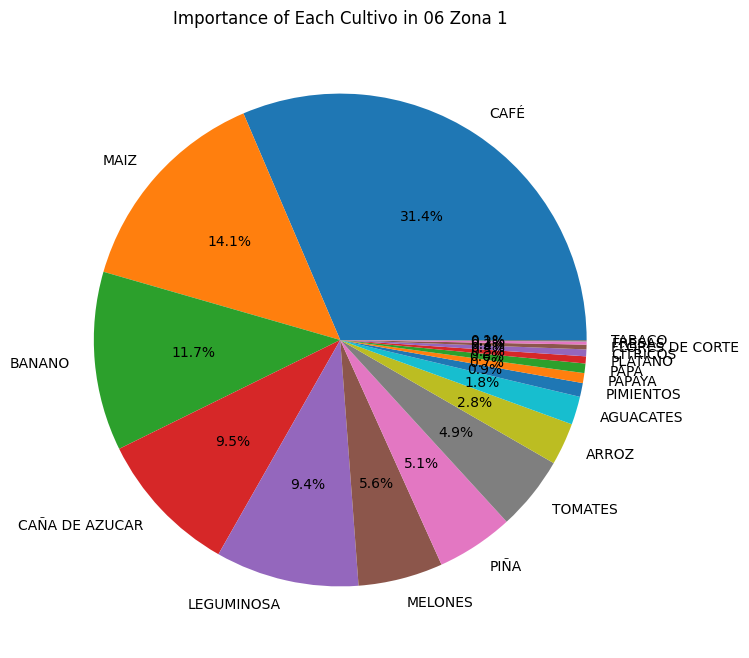

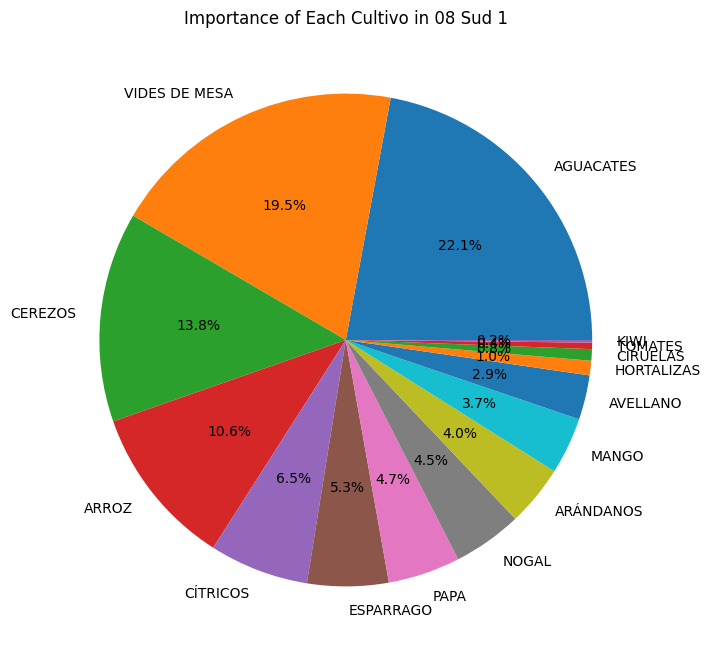

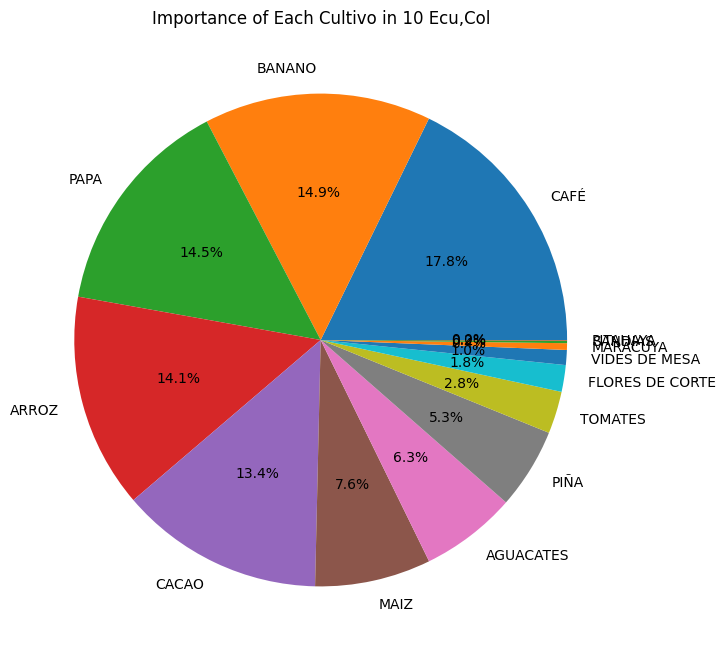

In [24]:
# Function to plot pie charts for each Atributo
def plot_pie_charts(df):
    atributos = reordered_df['Atributo'].unique()
    for atributo in atributos:
        df_atributo = reordered_df[reordered_df['Atributo'] == atributo]
        plt.figure(figsize=(8, 8))
        plt.pie(df_atributo['Valor'], labels=df_atributo['Cultivo'], autopct='%1.1f%%')
        plt.title(f'Importance of Each Cultivo in {atributo}')
        plt.show()

# Plot the pie charts
plot_pie_charts(df)

## Pie de cultivo por país

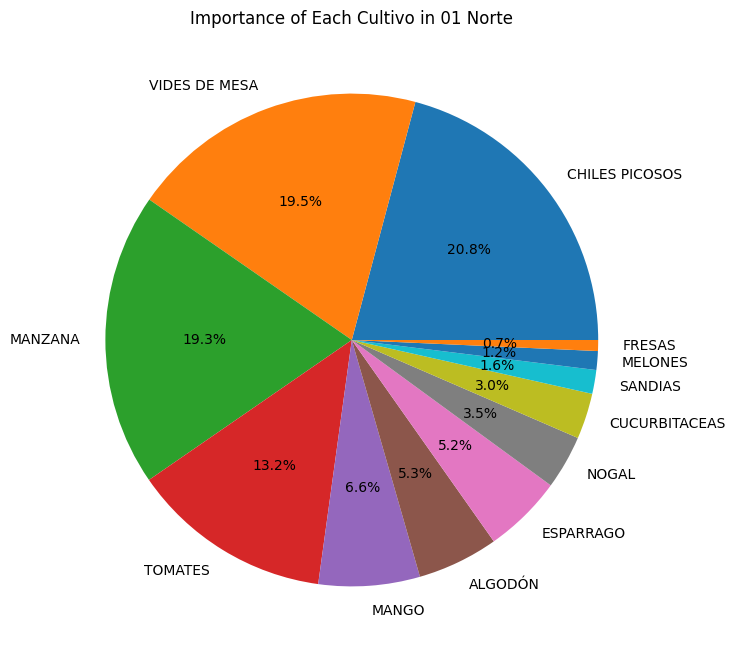

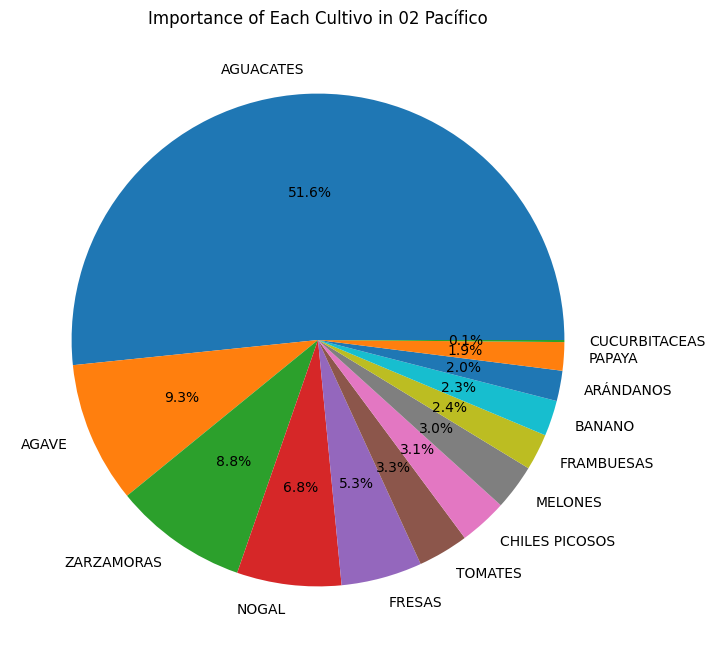

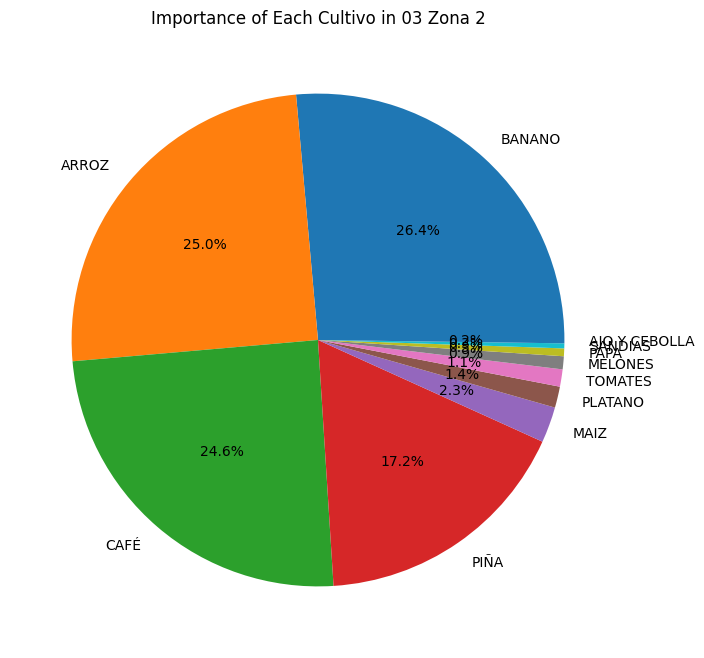

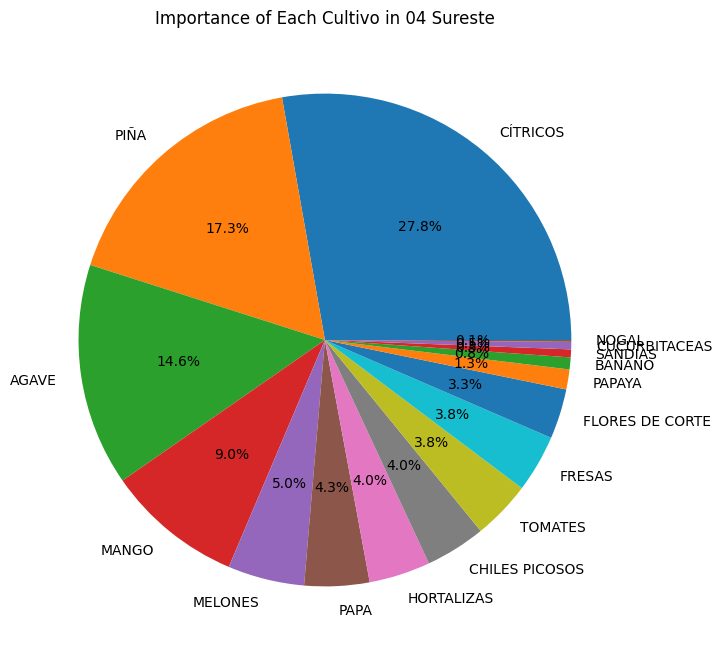

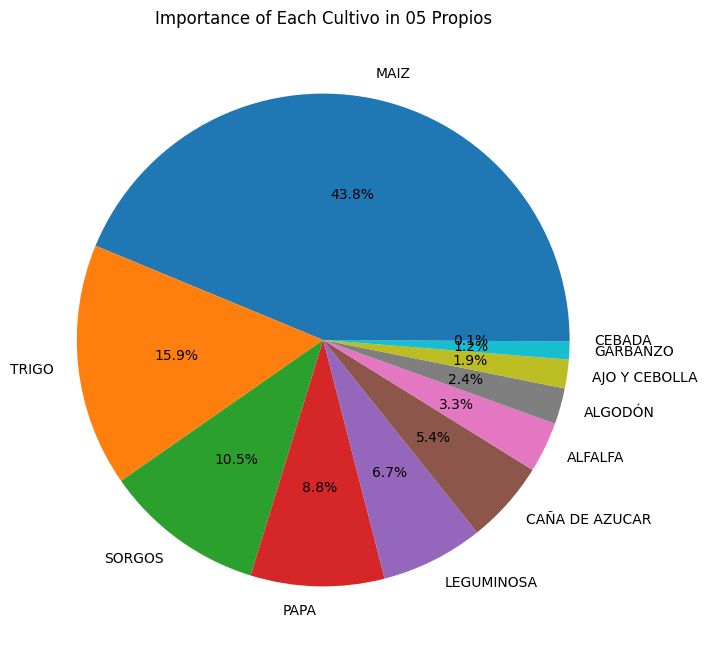

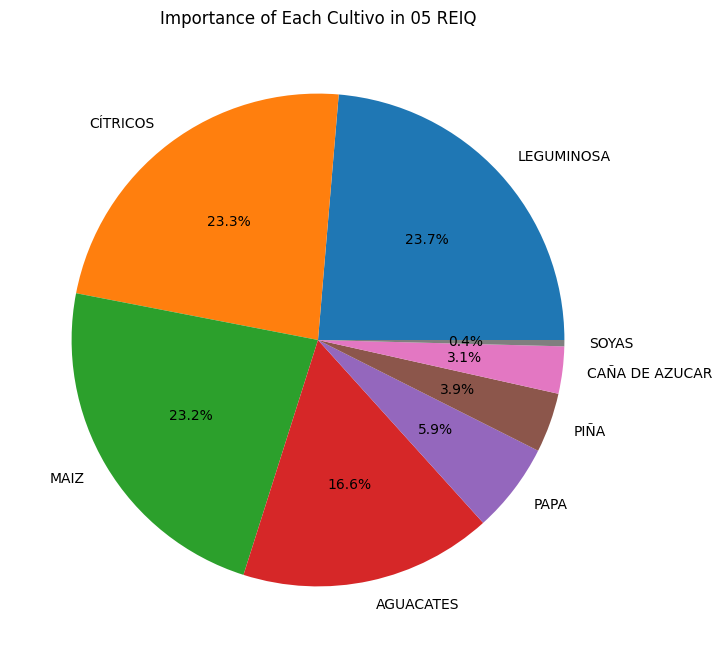

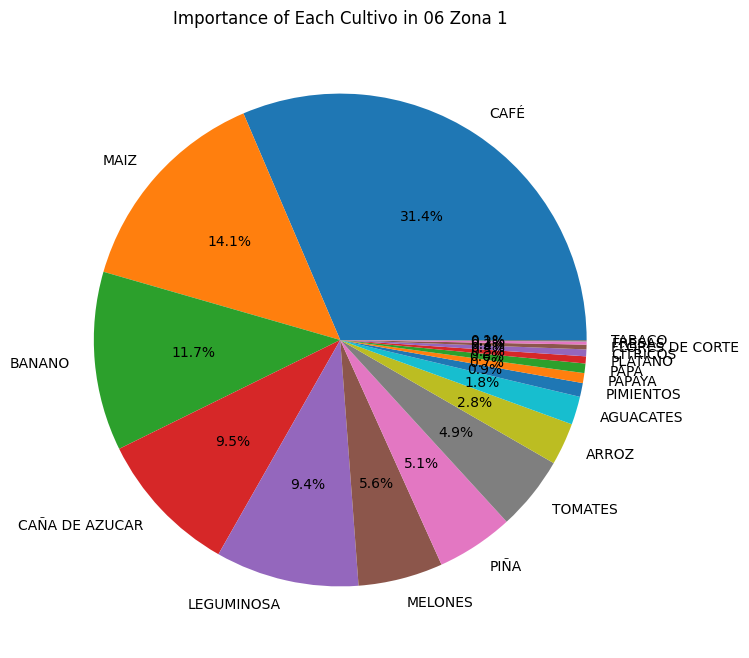

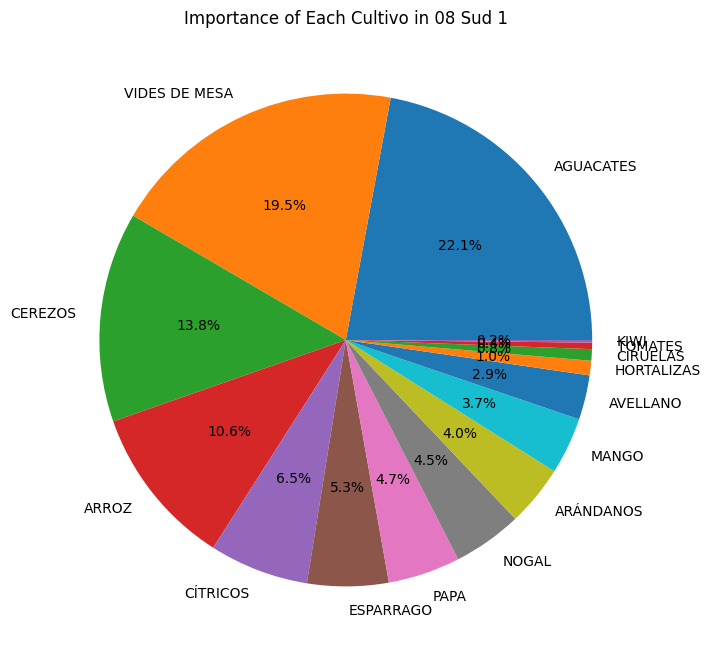

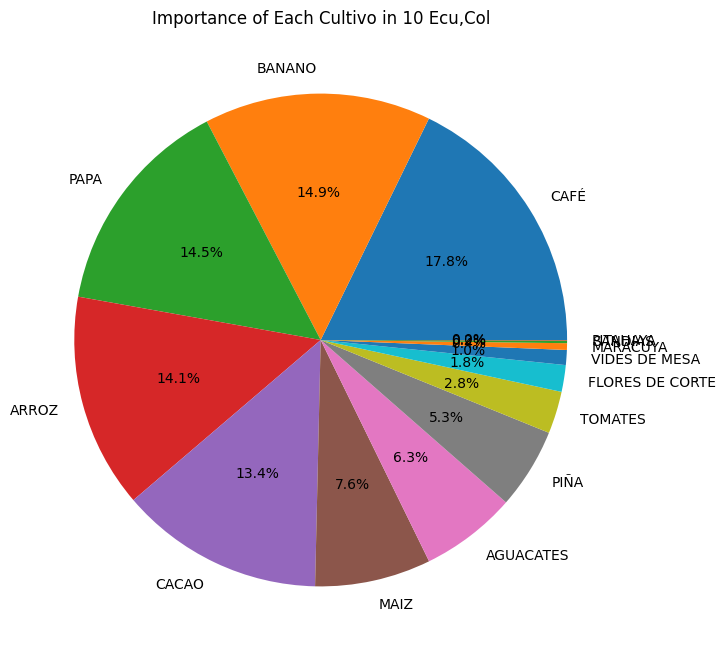

In [25]:
# Function to plot pie charts for each Atributo
def plot_pie_charts(df):
    atributos = reordered_df_p['Atributo'].unique()
    for atributo in atributos:
        df_atributo_p = reordered_df_p[reordered_df_p['Atributo'] == atributo]
        plt.figure(figsize=(8, 8))
        plt.pie(df_atributo_p['Valor'], labels=df_atributo_p['Cultivo'], autopct='%1.1f%%')
        plt.title(f'Importance of Each Cultivo in {atributo}')
        plt.show()

# Plot the pie charts
plot_pie_charts(df)

## Barra de cultivos potenciales, apilada por país

In [26]:
# Pivot the DataFrame to get the sum of 'Volumen_potencial__kL_' for each 'Cultivo' and 'Zona.País'
Potencial_por_país_y_cult = merged_df.pivot_table(index='Cultivo', columns='Zona.País', values='Volumen_potencial__kL_', aggfunc='sum').fillna(0)

# Sort the rows by the sum of each row's values
Potencial_por_país_y_cult['Total'] = Potencial_por_país_y_cult.sum(axis=1)
pivot_df_sorted_pppc = Potencial_por_país_y_cult.sort_values(by='Total', ascending=False).head(20).drop('Total', axis=1)

# Melt the DataFrame to long format for Plotly
melted_df_2 = pivot_df_sorted_pppc.reset_index().melt(id_vars='Cultivo', var_name='Zona', value_name='Volumen Potencial (kL)')

# Create the Plotly figure
fig = px.bar(melted_df_2, x='Cultivo', y='Volumen Potencial (kL)', color='Zona', title='Volumen Potencial por Cultivo y Zona')

# Show the figure
fig.show()

## Barra de cultivos potenciales, apilada por zona

In [27]:
# Pivot the DataFrame to get the sum of 'Volumen_potencial__kL_' for each 'Cultivo' and 'Zona.País'
Potencial_por_país_y_cult_ppzc = merged_df.pivot_table(index='Cultivo', columns='Zona_Ranking', values='Volumen_potencial__kL_', aggfunc='sum').fillna(0)

# Sort the rows by the sum of each row's values
Potencial_por_país_y_cult_ppzc['Total'] = Potencial_por_país_y_cult_ppzc.sum(axis=1)
pivot_df_sorted_ppzc = Potencial_por_país_y_cult_ppzc.sort_values(by='Total', ascending=False).head(20).drop('Total', axis=1)

# Plotting
# Melt the DataFrame to long format for Plotly
melted_df = pivot_df_sorted_ppzc.reset_index().melt(id_vars='Cultivo', var_name='Zona', value_name='Volumen Potencial (kL)')

# Create the Plotly figure
fig = px.bar(melted_df, x='Cultivo', y='Volumen Potencial (kL)', color='Zona', title='Volumen Potencial por Cultivo y Zona')

# Show the figure
fig.show()

## Valor de utilidad potencial en kL

In [28]:
merged_df['Volumen_potencial__kL_'].sum()

9200.506365000001

## Barra de cultivos potenciales, apilada por empresa

In [29]:
# Pivot the DataFrame to get the sum of 'Volumen_potencial__kL_' for each 'Cultivo' and 'Zona.País'
Potencial_por_país_y_cult = merged_df.pivot_table(index='Cultivo', columns='Empresa', values='Volumen_potencial__kL_', aggfunc='sum').fillna(0)

# Sort the rows by the sum of each row's values
Potencial_por_país_y_cult['Total'] = Potencial_por_país_y_cult.sum(axis=1)
pivot_df_sorted_pppc = Potencial_por_país_y_cult.sort_values(by='Total', ascending=False).head(20).drop('Total', axis=1)

# Melt the DataFrame to long format for Plotly
melted_df_2 = pivot_df_sorted_pppc.reset_index().melt(id_vars='Cultivo', var_name='Zona', value_name='Volumen Potencial (kL)')

# Create the Plotly figure
fig = px.bar(melted_df_2, x='Cultivo', y='Volumen Potencial (kL)', color='Zona', title='Volumen Potencial por Cultivo y Zona')

# Show the figure
fig.show()

## Barra de potencial por empresa, apilada por cultivo

In [30]:
# Pivot the DataFrame to get the sum of 'Volumen_potencial__kL_' for each 'Cultivo' and 'Zona.País'
Potencial_por_país_y_cult = merged_df.pivot_table(index='Empresa', columns='Cultivo', values='Volumen_potencial__kL_', aggfunc='sum').fillna(0)

# Sort the rows by the sum of each row's values
Potencial_por_país_y_cult['Total'] = Potencial_por_país_y_cult.sum(axis=1)
pivot_df_sorted_pppc = Potencial_por_país_y_cult.sort_values(by='Total', ascending=False).head(20).drop('Total', axis=1)

# Melt the DataFrame to long format for Plotly
melted_df_2 = pivot_df_sorted_pppc.reset_index().melt(id_vars='Empresa', var_name='Cultivo', value_name='Volumen Potencial (kL)')

# Create the Plotly figure
fig = px.bar(melted_df_2, x='Empresa', y='Volumen Potencial (kL)', color='Cultivo', title='Volumen Potencial por Cultivo y Zona')

# Show the figure
fig.show()

## Barra de potencial por zona, apilada por cultivo

In [31]:
# Pivot the DataFrame to get the sum of 'Volumen_potencial__kL_' for each 'Cultivo' and 'Zona.País'
Potencial_por_país_y_cult = merged_df.pivot_table(index='Zona_Ranking', columns='Cultivo', values='Volumen_potencial__kL_', aggfunc='sum').fillna(0)

# Sort the rows by the sum of each row's values
Potencial_por_país_y_cult['Total'] = Potencial_por_país_y_cult.sum(axis=1)
pivot_df_sorted_pppc = Potencial_por_país_y_cult.sort_values(by='Total', ascending=False).head(20).drop('Total', axis=1)

# Melt the DataFrame to long format for Plotly
melted_df_2 = pivot_df_sorted_pppc.reset_index().melt(id_vars='Zona_Ranking', var_name='Cultivo', value_name='Volumen Potencial (kL)')

# Create the Plotly figure
fig = px.bar(melted_df_2, x='Zona_Ranking', y='Volumen Potencial (kL)', color='Cultivo', title='Volumen Potencial por Cultivo y Zona')

# Show the figure
fig.show()

## Barra de utilidad potencial por zona, apilada por cultivo

In [32]:
# Pivot the DataFrame to get the sum of 'Volumen_potencial__kL_' for each 'Cultivo' and 'Zona.País'
Potencial_por_país_y_cult = merged_df.pivot_table(index='Zona_Ranking', columns='Cultivo', values='Utilidad_potencial___M_', aggfunc='sum').fillna(0)

# Sort the rows by the sum of each row's values
Potencial_por_país_y_cult['Total'] = Potencial_por_país_y_cult.sum(axis=1)
pivot_df_sorted_pppc = Potencial_por_país_y_cult.sort_values(by='Total', ascending=False).head(20).drop('Total', axis=1)

# Melt the DataFrame to long format for Plotly
melted_df_2 = pivot_df_sorted_pppc.reset_index().melt(id_vars='Zona_Ranking', var_name='Cultivo', value_name='Utilidad Potencial ($M)')

# Create the Plotly figure
fig = px.bar(melted_df_2, x='Zona_Ranking', y='Utilidad Potencial ($M)', color='Cultivo', title='Utilidad Potencial por Cultivo y Zona')

# Show the figure
fig.show()

## Ejemplo detalle de potencial de café en Zona 1

In [33]:
# Assuming merged_df is your DataFrame
# merged_df = pd.read_csv('your_data.csv')

# Filter the DataFrame
filtered_df = merged_df[(merged_df['Cultivo'] == 'CAFÉ') & (merged_df['Zona_Ranking'] == '06 Zona 1')]

# Group by 'RM/REIQ' and sum 'Volumen_potencial__kL_'
grouped_df = filtered_df.groupby(['RM/REIQ','Producto_'])['Volumen_potencial__kL_'].sum().reset_index()

# Sort the DataFrame in descending order by 'Volumen_potencial__kL_'
grouped_df_sorted = grouped_df.sort_values(by=['Volumen_potencial__kL_'], ascending=False)

# Sort by 'RM/REIQ' and 'Producto_' to see the most important client and products first
grouped_df_sorted.sort_values(['RM/REIQ', 'Producto_'], ascending=[False, False], inplace=True)

# Create the Plotly figure
fig = px.bar(grouped_df_sorted, x='RM/REIQ', y='Volumen_potencial__kL_', color='Producto_', title='Volumen Potencial por RM/REIQ y Producto')

# Show the figure
fig.show()



## Ejemplo detalle de potencial de aguacate en Perú y Chile

In [34]:
# Assuming merged_df is your DataFrame
# merged_df = pd.read_csv('your_data.csv')

# Filter the DataFrame
filtered_df = merged_df[(merged_df['Cultivo'] == 'AGUACATES') & (merged_df['Zona_Ranking'] == '08 Sud 1')]

# Group by 'RM/REIQ' and sum 'Volumen_potencial__kL_'
grouped_df = filtered_df.groupby(['RM/REIQ','Producto_'])['Volumen_potencial__kL_'].sum().reset_index()

# Sort the DataFrame in descending order by 'Volumen_potencial__kL_'
grouped_df_sorted = grouped_df.sort_values(by=['Volumen_potencial__kL_'], ascending=False)

# Sort by 'RM/REIQ' and 'Producto_' to see the most important client and products first
grouped_df_sorted.sort_values(['RM/REIQ', 'Producto_'], ascending=[False, False], inplace=True)

# Create the Plotly figure
fig = px.bar(grouped_df_sorted, x='RM/REIQ', y='Volumen_potencial__kL_', color='Producto_', title='Volumen Potencial por RM/REIQ y Producto')

# Show the figure
fig.show()